# Análise Descritiva 4 - Prática

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Carregando dados

df = pd.read_pickle('./input/base_nfp.pkl')
print(df.shape)
df.head()

(187646, 13)


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [4]:
# Selecionando os dados
df2 = df[df['Data Emissão'] >= '2020-01-01']
print(df2.shape)
df2.head(2)

(86956, 13)


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado


In [5]:
# Qunado flag_credito igual a 0
df2[df2.flag_credito == 0]['Retorno'].unique()

array([ 0., nan])

In [6]:
# Quando flag_credito igual a 1
df2[df2.flag_credito == 1]['Retorno'].unique()

array([0.05973623, 0.04247819, 0.05740741, ..., 0.18380062, 0.04355885,
       0.39676708])

In [7]:
# Gerando uma crosstab para os valores 
# Utilizando flag_credito, uma vez que quando igual a 1 indica um retorno > 0

tab = pd.crosstab(df2.categoria, df2.flag_credito, margins=True, margins_name='total')
tab['pct_retorno=0'] = tab[0] / tab.loc['total', 0]
tab['pct_retorno>0'] = tab[1] / tab.loc['total', 1]
tab

flag_credito,0,1,total,pct_retorno=0,pct_retorno>0
categoria,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234
Auto posto,405,135,540,0.008159,0.003618
Construção,8524,7523,16047,0.171723,0.201592
Farmácia,6607,3582,10189,0.133104,0.095986
Mercado,14381,13177,27558,0.289718,0.353100
Restaurantes,553,1626,2179,0.011141,0.043571
Varejo,4365,701,5066,0.087937,0.018785
Vestuário,1477,443,1920,0.029755,0.011871
não definido,11718,6689,18407,0.236069,0.179243


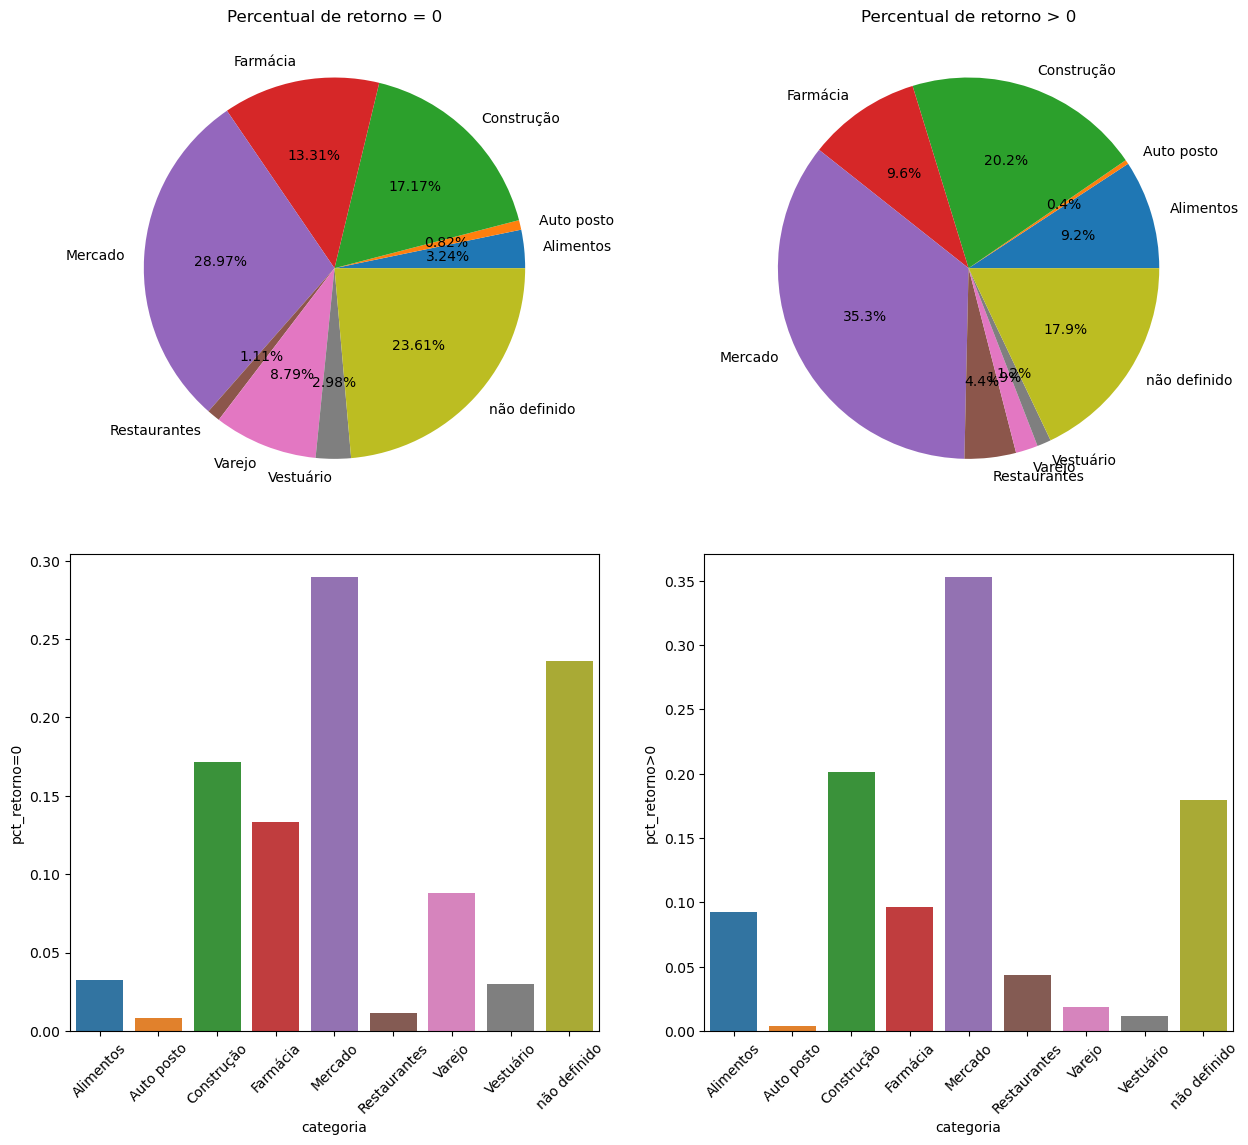

In [8]:
# Vizualizando as porcentagens
fig, ax = plt.subplots(2,2,figsize=[15,13])

ax[0,0].pie(tab.drop(index='total')['pct_retorno=0'],
        autopct = '%.2f%%',
        labels=list(tab.drop(index='total').index)
      )
ax[0,0].set_title('Percentual de retorno = 0')

ax[0,1].pie(tab.drop(index='total')['pct_retorno>0'],
        autopct = '%1.1f%%',
        labels=list(tab.drop(index='total').index)
      )
ax[0,1].set_title('Percentual de retorno > 0')

# Gráficos de barras
sns.barplot(x = tab.drop(index='total').index,
            y = tab.drop(index='total')['pct_retorno=0'],
            hue = tab.drop(index='total').index,
            ax=ax[1,0]
      )
ax[1,0].tick_params(axis = 'x', rotation=45)

sns.barplot(x = tab.drop(index='total').index,
            y = tab.drop(index='total')['pct_retorno>0'],
            hue = tab.drop(index='total').index,
            ax=ax[1,1]
      )
ax[1,1].tick_params(axis = 'x', rotation=45)

plt.subplots_adjust(hspace=0.1)
plt.show()

In [9]:
# Note que há um valor atípico de retorno
df2[df2.Retorno > 50]

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
161675,34.758.811/0001-78,MOLI OTICAS LTDA,1680,2021-11-01,0.05,2021-11-01,47.08,Liberado,2021,1,941.6,1,não definido


##### Visualização gráfica adicionais (com base no dataframe)

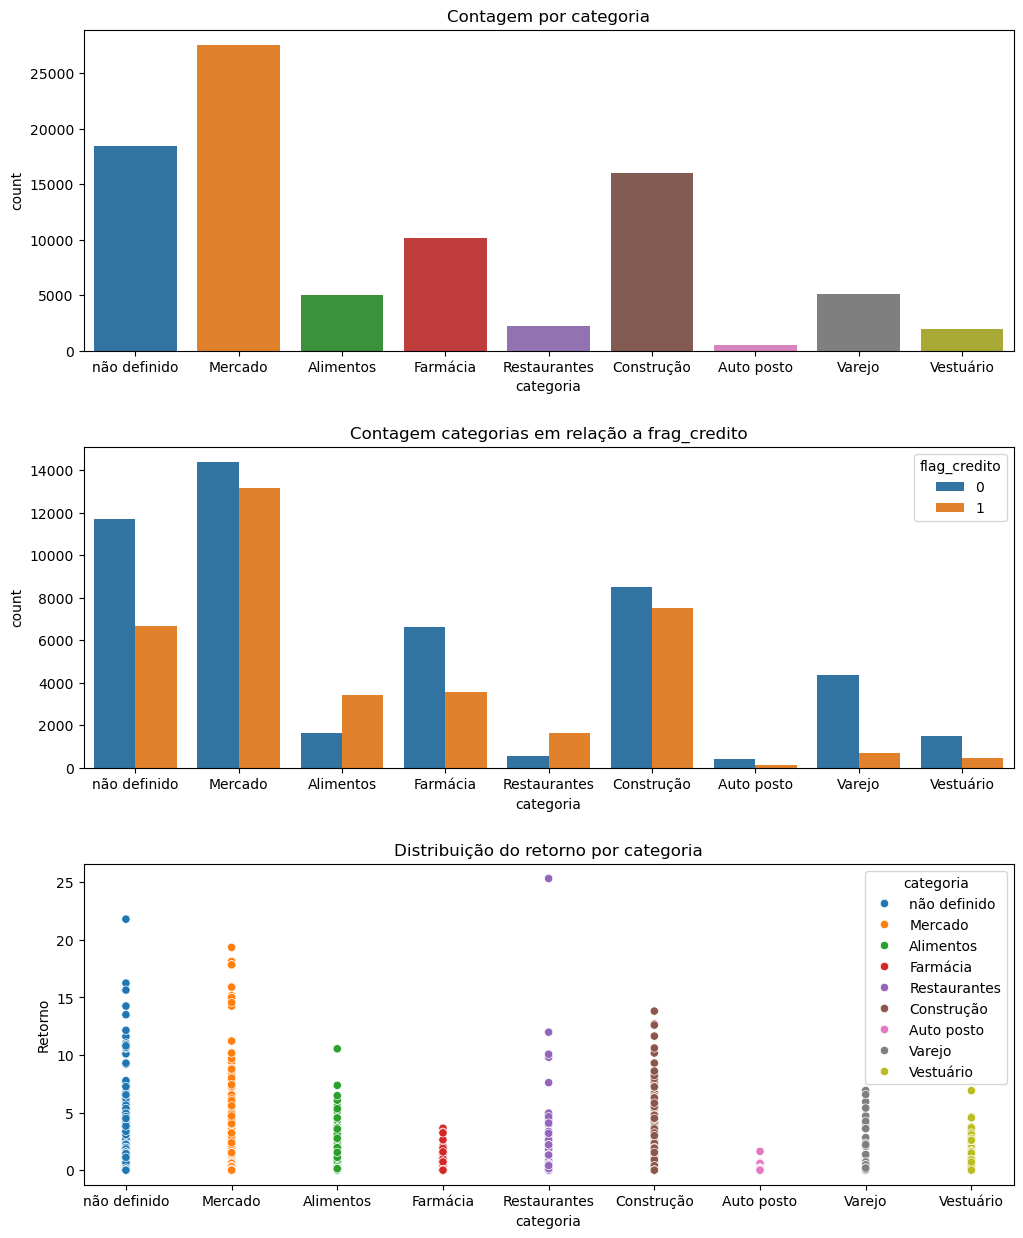

In [10]:
fig, ax = plt.subplots(3, 1, figsize=[12,15])
# Contagem das categorias
sns.countplot(data=df2, x = 'categoria', hue='categoria', ax=ax[0])
ax[0].set_title('Contagem por categoria')
# Contagem das categorias em função da flag_credito
sns.countplot(data=df2, x = 'categoria', hue = 'flag_credito', ax=ax[1])
ax[1].set_title('Contagem categorias em relação a frag_credito')
# distribuição dos retornos por categoria
sns.scatterplot(data=df2[df2.Retorno < 50], 
                x = 'categoria', 
                y = 'Retorno',
                hue = 'categoria', 
                ax=ax[2])
ax[2].set_title('Distribuição do retorno por categoria')
fig.subplots_adjust(hspace=.3)

plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [11]:
tab['woe'] = np.log(tab['pct_retorno>0'] / tab['pct_retorno=0'])
tab

flag_credito,0,1,total,pct_retorno=0,pct_retorno>0,woe
categoria,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,1.046342
Auto posto,405,135,540,0.008159,0.003618,-0.813331
Construção,8524,7523,16047,0.171723,0.201592,0.160360
Farmácia,6607,3582,10189,0.133104,0.095986,-0.326928
Mercado,14381,13177,27558,0.289718,0.353100,0.197846
Restaurantes,553,1626,2179,0.011141,0.043571,1.363801
Varejo,4365,701,5066,0.087937,0.018785,-1.543585
Vestuário,1477,443,1920,0.029755,0.011871,-0.918918
não definido,11718,6689,18407,0.236069,0.179243,-0.275381


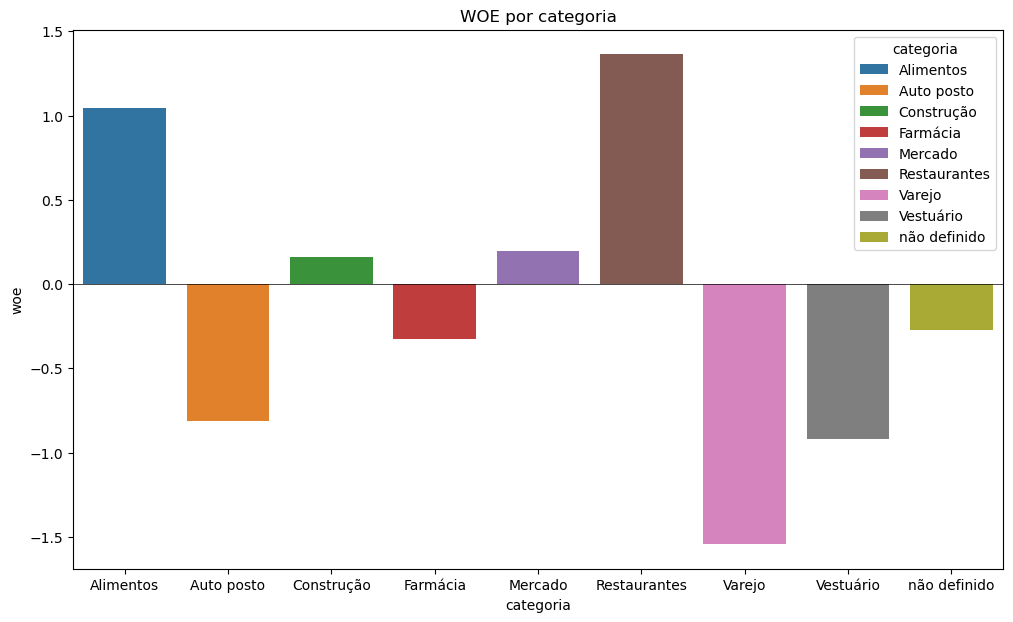

In [12]:
# Visualização gráfica
plt.figure(figsize=[12,7])

sns.barplot(x = tab.reset_index()['categoria'].drop(index=9), 
            y = tab.reset_index().woe,
            hue = tab.reset_index().drop(index=9)['categoria'],
            # color = 'green'
           )
plt.axhline(0, color='black', lw = .5)
plt.title('WOE por categoria')
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [13]:
# Adicionando o information value à tabela

tab['IV'] = (tab['pct_retorno>0'] - tab['pct_retorno=0'])*tab.woe
tab

flag_credito,0,1,total,pct_retorno=0,pct_retorno>0,woe,IV
categoria,,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,1.046342,0.062613
Auto posto,405,135,540,0.008159,0.003618,-0.813331,0.003694
Construção,8524,7523,16047,0.171723,0.201592,0.160360,0.004790
Farmácia,6607,3582,10189,0.133104,0.095986,-0.326928,0.012135
Mercado,14381,13177,27558,0.289718,0.353100,0.197846,0.012540
Restaurantes,553,1626,2179,0.011141,0.043571,1.363801,0.044229
Varejo,4365,701,5066,0.087937,0.018785,-1.543585,0.106742
Vestuário,1477,443,1920,0.029755,0.011871,-0.918918,0.016434
não definido,11718,6689,18407,0.236069,0.179243,-0.275381,0.015649


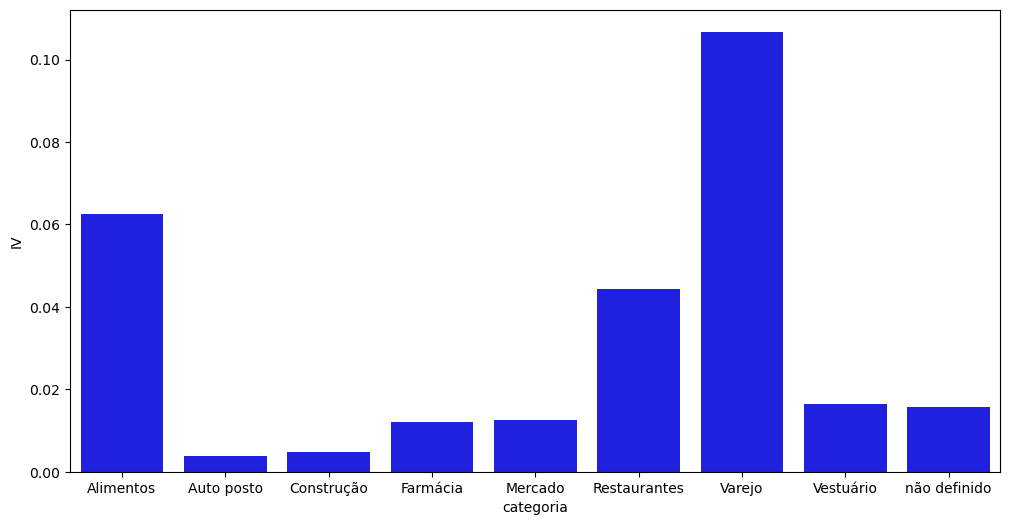

In [14]:
# Visualização gráfica do information value por categoria

plt.figure(figsize=[12,6])

sns.barplot(data = tab.reset_index(), 
            x = tab.reset_index()['categoria'].drop(index=9), 
            y = tab.reset_index().IV, 
            color = 'blue')
plt.show()

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


#### Separando alguns painéis

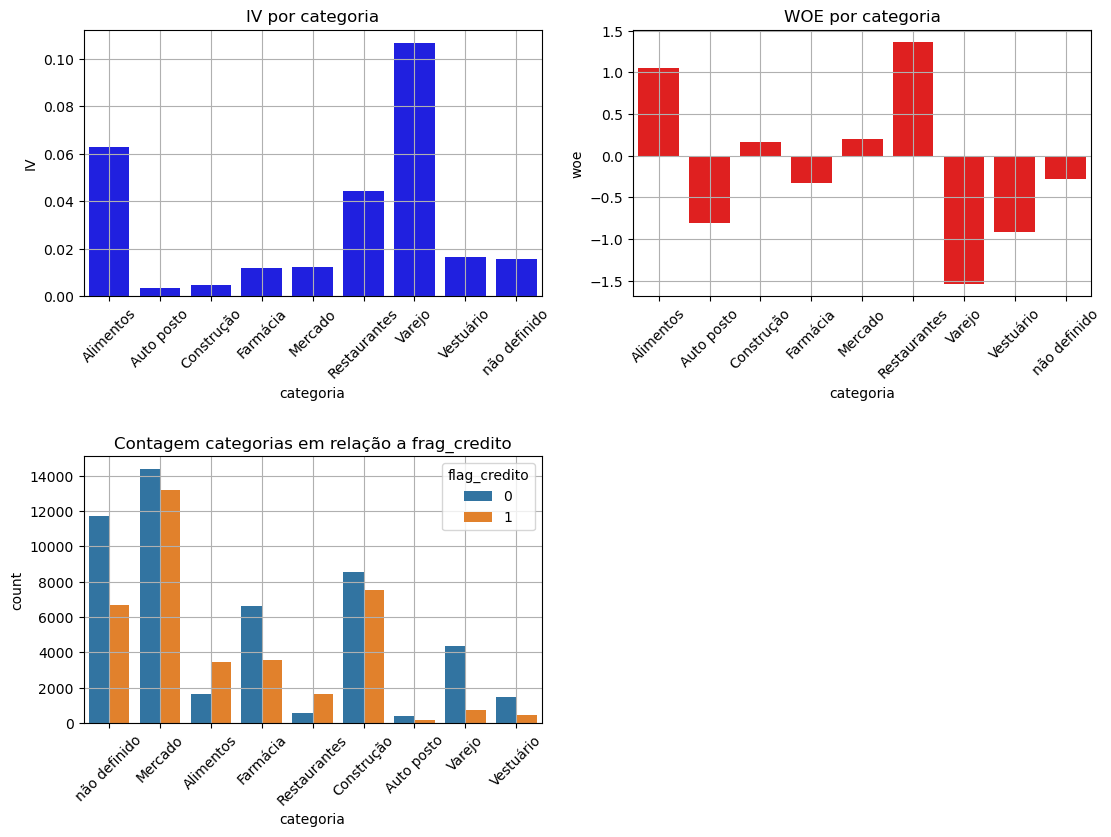

In [43]:
# Valores de IV e WOE
fig, ax = plt.subplots(2,2, figsize=[13,9])
sns.barplot(data = tab.reset_index(), 
            x = tab.reset_index()['categoria'].drop(index=9), 
            y = tab.reset_index().IV, 
            color = 'blue',
            ax = ax[0,0])
ax[0,0].tick_params('x', rotation=45)
ax[0,0].set_title('IV por categoria')
ax[0,0].grid()
sns.barplot(data = tab.reset_index(), 
            x = tab.reset_index()['categoria'].drop(index=9), 
            y = tab.reset_index().woe, 
            color = 'red',
            ax = ax[0,1])
ax[0,1].tick_params('x', rotation=45)
ax[0,1].set_title('WOE por categoria')
ax[0,1].grid()

sns.countplot(data=df2, x = 'categoria', hue = 'flag_credito', ax=ax[1,0])
ax[1,0].tick_params('x', rotation=45)
ax[1,0].set_title('Contagem categorias em relação a frag_credito')
ax[1,0].grid()

plt.delaxes(ax[1,1])

plt.subplots_adjust(hspace=.6)
plt.show()

### <span style='color:red'> Insights </span>

Façamos uma análise dos valores de IV.

Vejamos as informações que a variável <font color='blue'> categoria </font> pode nos fornecer e que tem valores de IV e **woe** relevantes.

- <font color='purple'> Varejo, Alimentos e Restaurantes </font> possuem os valores mais altos de *information value* (IV);
- <font color='purple'> Alimentos e Restaurantes </font> possuem bons indicativos de fornecimento de créditos na emissão de suas notas, uma vez que os valores de **woe** são positivos e os valores de **IV** são relativamente altos;
- O valor de IV para <font color='purple'> Varejo </font> é o mais alto, indicando que há uma boa separação entre os eventos e não eventos. O valor de **woe** para essa mesma subcategoria é em módulo o maior, porém negativo, indicando que a maioria das notas emitidas ficaram sem fornecer créditos (vide figura *contagem categorias em relação a flag_credito* e também a tabela 2 abaixo, cuja proporção da flag_credito é mensurada e a porcentagem de não ocorrência é sensivelmente superior à de ocorrência em tal subcategoria). Isso pode ocorrer devido a venda de produtos não incentivados, como cigarro e bebidas alcoólicas, em lojas de varejo e as notas de tais produtos não dão retorno.
- <font color='purple'> Auto posto </font> não aparenta ser um local favorável no fornecimento de crédito, uma vez que seu IV é baixo (o mais baixo dentre as subcategorias) e seu **woe** é negativo.

In [15]:
# Tabela 2 com as proporções das flags dentro da contagem de cada categoria
tab2 = tab.loc[:, [0, 1, 'total']]
tab2['proporção_0_na_categoria'] = tab2[0] / tab2['total']
tab2['proporçãona_1_categoria_'] = tab2[1] / tab2['total']
tab2.style.highlight_max(subset='proporção_0_na_categoria')

flag_credito,0,1,total,proporção_0_na_categoria,proporçãona_1_categoria_
categoria,,,,,
Alimentos,1608,3442,5050,0.318416,0.681584
Auto posto,405,135,540,0.750000,0.250000
Construção,8524,7523,16047,0.531190,0.468810
Farmácia,6607,3582,10189,0.648444,0.351556
Mercado,14381,13177,27558,0.521845,0.478155
Restaurantes,553,1626,2179,0.253786,0.746214
Varejo,4365,701,5066,0.861627,0.138373
Vestuário,1477,443,1920,0.769271,0.230729
não definido,11718,6689,18407,0.636606,0.363394
